# IBM DataScience - Capstone Project - Part 2 - Sven De Smit

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline

## Reading datasets from files

In [2]:
df_cities = pd.read_csv('cities_dataset.csv')
print('Number of cities:',df_cities.shape[0]) 
df_cities.head(10)

Number of cities: 581


,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,BoundingBox
0,1,Antwerpen,525.935,443.000,"204,51",2.572,"88,2",Antwerpen,51.221110,4.399708,"['51.1432868', '51.3776412', '4.2175769', '4.4..."
1,2,Gent,262.219,204.000,"156,18",1.679,"102,3",Oost-Vlaanderen,51.053829,3.725012,"['50.9795422', '51.187946', '3.5797616', '3.84..."
2,3,Charleroi,202.267,370.000,"102,08",1.982,"73,0",Henegouwen,50.412033,4.443624,"['50.3527894', '50.4925149', '4.3474458', '4.5..."
3,4,Luik,197.327,219.000,"69,39",2.844,"81,4",Luik,50.645138,5.573420,"['50.5610182', '50.6881981', '5.5233883', '5.6..."
4,5,Brussel,181.726,140.000,"32,61",5.573,"70,0",Brussel,50.846557,4.351697,"['50.6865573', '51.0065573', '4.191697', '4.51..."
5,6,Schaarbeek,133.309,2.146,"8,14",16.377,"65,4",Brussel,50.867604,4.373712,"['50.8434069', '50.8811977', '4.3571322', '4.4..."
6,7,Anderlecht,119.714,2.007,"17,74",6.747,"63,8",Brussel,50.839098,4.329653,"['50.8070598', '50.850549', '4.2437658', '4.34..."
7,8,Brugge,118.325,194.000,"138,40",855.000,"111,7",West-Vlaanderen,51.208553,3.226772,"['51.1581918', '51.363347', '3.1341802', '3.30..."
8,9,Namen,110.779,260.000,"175,69",631.000,"99,9",Namen,50.466528,4.866189,"['50.3872825', '50.5313007', '4.723053', '4.98..."
9,10,Leuven,101.624,288.000,"56,63",1.794,"113,6",Vlaams-Brabant,50.879202,4.701168,"['50.8242096', '50.9440707', '4.640295', '4.77..."


In [3]:
df_cities_multilang = pd.read_csv('cities_multilang_dataset.csv')
df_cities_multilang.head(10)

,Frans,Nederlands,Duits,Begin,Einde,Name
0,NaN,Puurs-Sint-Amands,NaN,01.01.2019,31.12.9999,Puurs-Sint-Amands
1,NaN,Deinze,NaN,01.01.2019,31.12.9999,Deinze
2,NaN,Aalter,NaN,01.01.2019,31.12.9999,Aalter
3,NaN,Lievegem,NaN,01.01.2019,31.12.9999,Lievegem
4,NaN,Kruisem,NaN,01.01.2019,31.12.9999,Kruisem
5,Enghien,Edingen,NaN,01.01.2019,31.12.9999,Edingen
6,Silly,Opzullik,NaN,01.01.2019,31.12.9999,Opzullik
7,Lessines,Lessen,NaN,01.01.2019,31.12.9999,Lessen
8,Seneffe,-,-,01.01.2019,31.12.9999,Seneffe
9,Manage,-,-,01.01.2019,31.12.9999,Manage


In [4]:
df_venues = pd.read_csv('be_venues.csv')
df_venues.head(10)

,City,Venue,Venue Latitude,Venue Longitude,Category Class,Venue Category
0,Antwerpen,Moochie Frozen Yoghurt,51.220036,4.402850,https://ss3.4sqi.net/img/categories_v2/food/fr...,Frozen Yogurt Shop
1,Antwerpen,Dogma Cocktails,51.221146,4.402854,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar
2,Antwerpen,Absinthbar,51.219912,4.400709,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar
3,Antwerpen,Pitten en Bonen,51.217657,4.402712,https://ss3.4sqi.net/img/categories_v2/food/ju...,Juice Bar
4,Antwerpen,Kartini Indonesisch Restaurant,51.219270,4.400557,https://ss3.4sqi.net/img/categories_v2/food/in...,Indonesian Restaurant
5,Antwerpen,Hunkemöller,51.218611,4.405531,https://ss3.4sqi.net/img/categories_v2/shops/a...,Lingerie Store
6,Antwerpen,Brasserie Appelmans,51.219879,4.400717,https://ss3.4sqi.net/img/categories_v2/nightli...,Cocktail Bar
7,Antwerpen,Quetzal,51.220625,4.402132,https://ss3.4sqi.net/img/categories_v2/food/co...,Coffee Shop
8,Antwerpen,Maison Tartine,51.221703,4.404996,https://ss3.4sqi.net/img/categories_v2/food/deli_,Sandwich Place
9,Antwerpen,Bia Mara,51.220894,4.400189,https://ss3.4sqi.net/img/categories_v2/food/fi...,Fish & Chips Shop


## Data cleansing and preparation

### Cities dataset

#### Translate prosperity index column to numeric

In [5]:
df_cities['ProsperityIndex'].replace({',': '.'}, regex=True,inplace=True)
ser_num = pd.to_numeric(df_cities['ProsperityIndex'])
df_cities['ProsperityIndex'] = ser_num
#df_cities

#### Translate acreage column to numeric

In [7]:
df_cities['Acreage'].replace({',': '.'}, regex=True,inplace=True)
ser_num = pd.to_numeric(df_cities['Acreage'])
df_cities['Acreage'] = ser_num
#df_cities

In [8]:
df_cities.dtypes

ID                        int64
Name                     object
Habitants               float64
Index                   float64
Acreage                 float64
HabitantsPerSquareKm    float64
ProsperityIndex         float64
Province                 object
Latitude                float64
Longitude               float64
BoundingBox              object
dtype: object

In [9]:
df_cities.head()

,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,BoundingBox
0,1,Antwerpen,525.935,443.0,204.51,2.572,88.2,Antwerpen,51.221110,4.399708,"['51.1432868', '51.3776412', '4.2175769', '4.4..."
1,2,Gent,262.219,204.0,156.18,1.679,102.3,Oost-Vlaanderen,51.053829,3.725012,"['50.9795422', '51.187946', '3.5797616', '3.84..."
2,3,Charleroi,202.267,370.0,102.08,1.982,73.0,Henegouwen,50.412033,4.443624,"['50.3527894', '50.4925149', '4.3474458', '4.5..."
3,4,Luik,197.327,219.0,69.39,2.844,81.4,Luik,50.645138,5.573420,"['50.5610182', '50.6881981', '5.5233883', '5.6..."
4,5,Brussel,181.726,140.0,32.61,5.573,70.0,Brussel,50.846557,4.351697,"['50.6865573', '51.0065573', '4.191697', '4.51..."


#### Translate the city name for different purposes

Create Name column for matching with cities dataframe  

In [10]:
is_latest =  df_cities_multilang['Einde']=='31.12.9999'
df_cities_multilang = df_cities_multilang[is_latest]
print('Number of cities:',df_cities_multilang.shape[0])
df_cities_multilang.head()


Number of cities: 636


,Frans,Nederlands,Duits,Begin,Einde,Name
0,NaN,Puurs-Sint-Amands,NaN,01.01.2019,31.12.9999,Puurs-Sint-Amands
1,NaN,Deinze,NaN,01.01.2019,31.12.9999,Deinze
2,NaN,Aalter,NaN,01.01.2019,31.12.9999,Aalter
3,NaN,Lievegem,NaN,01.01.2019,31.12.9999,Lievegem
4,NaN,Kruisem,NaN,01.01.2019,31.12.9999,Kruisem


In [11]:
df_cities_multilang['Name'] = np.where(df_cities_multilang['Nederlands'] == '-', df_cities_multilang['Frans'], df_cities_multilang['Nederlands'])
df_cities_multilang.head()

,Frans,Nederlands,Duits,Begin,Einde,Name
0,NaN,Puurs-Sint-Amands,NaN,01.01.2019,31.12.9999,Puurs-Sint-Amands
1,NaN,Deinze,NaN,01.01.2019,31.12.9999,Deinze
2,NaN,Aalter,NaN,01.01.2019,31.12.9999,Aalter
3,NaN,Lievegem,NaN,01.01.2019,31.12.9999,Lievegem
4,NaN,Kruisem,NaN,01.01.2019,31.12.9999,Kruisem


#### Merge cities dataframe with multi-language dataframe to have the names of the cities in all languages  

In [12]:
df_cities_and_lang = df_cities.merge(df_cities_multilang,how='left')
print('Cities in original cities dataframe',df_cities.shape[0])
print('Cities in original multi-language dataframe',df_cities_multilang.shape[0])
print('Cities in merged dataframe',df_cities_and_lang.shape[0])
df_cities_and_lang

Cities in original cities dataframe 581
Cities in original multi-language dataframe 636
Cities in merged dataframe 581


,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,BoundingBox,Frans,Nederlands,Duits,Begin,Einde
0,1,Antwerpen,525.935,443.000,204.51,2.572,88.2,Antwerpen,51.221110,4.399708,"['51.1432868', '51.3776412', '4.2175769', '4.4...",Anvers,Antwerpen,Antwerpen,01.01.0001,31.12.9999
1,2,Gent,262.219,204.000,156.18,1.679,102.3,Oost-Vlaanderen,51.053829,3.725012,"['50.9795422', '51.187946', '3.5797616', '3.84...",Gand,Gent,Gent,01.01.0001,31.12.9999
2,3,Charleroi,202.267,370.000,102.08,1.982,73.0,Henegouwen,50.412033,4.443624,"['50.3527894', '50.4925149', '4.3474458', '4.5...",Charleroi,-,-,01.01.0001,31.12.9999
3,4,Luik,197.327,219.000,69.39,2.844,81.4,Luik,50.645138,5.573420,"['50.5610182', '50.6881981', '5.5233883', '5.6...",Liège,Luik,Lüttich,01.01.0001,31.12.9999
4,5,Brussel,181.726,140.000,32.61,5.573,70.0,Brussel,50.846557,4.351697,"['50.6865573', '51.0065573', '4.191697', '4.51...",Bruxelles,Brussel,-,01.01.0001,31.12.9999
5,6,Schaarbeek,133.309,2.146,8.14,16.377,65.4,Brussel,50.867604,4.373712,"['50.8434069', '50.8811977', '4.3571322', '4.4...",Schaerbeek,Schaarbeek,-,01.01.0001,31.12.9999
6,7,Anderlecht,119.714,2.007,17.74,6.747,63.8,Brussel,50.839098,4.329653,"['50.8070598', '50.850549', '4.2437658', '4.34...",Anderlecht,Anderlecht,-,01.01.0001,31.12.9999
7,8,Brugge,118.325,194.000,138.40,855.000,111.7,West-Vlaanderen,51.208553,3.226772,"['51.1581918', '51.363347', '3.1341802', '3.30...",Bruges,Brugge,Brügge,01.01.0001,31.12.9999
8,9,Namen,110.779,260.000,175.69,631.000,99.9,Namen,50.466528,4.866189,"['50.3872825', '50.5313007', '4.723053', '4.98...",Namur,Namen,-,01.01.0001,31.12.9999
9,10,Leuven,101.624,288.000,56.63,1.794,113.6,Vlaams-Brabant,50.879202,4.701168,"['50.8242096', '50.9440707', '4.640295', '4.77...",Louvain,Leuven,Löwen,01.01.0001,31.12.9999


### Create 'geojson_name' for matching with geojson file

In [13]:
french_provinces = ['Henegouwen','Luik','Waals-Brabant','Namen','Luxemburg']
is_fr = df_cities_and_lang['Province'].isin(french_provinces)
#df_cities_and_lang[is_fr]
df_cities_and_lang['geojson_name'] = np.where(is_fr,df_cities_and_lang['Frans'], df_cities_and_lang['Name'])
print('Cities in merged dataframe',df_cities_and_lang.shape[0])
df_cities_and_lang.head()

Cities in merged dataframe 581


,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,BoundingBox,Frans,Nederlands,Duits,Begin,Einde,geojson_name
0,1,Antwerpen,525.935,443.0,204.51,2.572,88.2,Antwerpen,51.221110,4.399708,"['51.1432868', '51.3776412', '4.2175769', '4.4...",Anvers,Antwerpen,Antwerpen,01.01.0001,31.12.9999,Antwerpen
1,2,Gent,262.219,204.0,156.18,1.679,102.3,Oost-Vlaanderen,51.053829,3.725012,"['50.9795422', '51.187946', '3.5797616', '3.84...",Gand,Gent,Gent,01.01.0001,31.12.9999,Gent
2,3,Charleroi,202.267,370.0,102.08,1.982,73.0,Henegouwen,50.412033,4.443624,"['50.3527894', '50.4925149', '4.3474458', '4.5...",Charleroi,-,-,01.01.0001,31.12.9999,Charleroi
3,4,Luik,197.327,219.0,69.39,2.844,81.4,Luik,50.645138,5.573420,"['50.5610182', '50.6881981', '5.5233883', '5.6...",Liège,Luik,Lüttich,01.01.0001,31.12.9999,Liège
4,5,Brussel,181.726,140.0,32.61,5.573,70.0,Brussel,50.846557,4.351697,"['50.6865573', '51.0065573', '4.191697', '4.51...",Bruxelles,Brussel,-,01.01.0001,31.12.9999,Brussel


In [14]:
df_cities_and_lang['geojson_name'].replace(
    {'Brussel': 'Brussel#Bruxelles',
    'Elsene': 'Elsene#Ixelles',
    'Oudergem': 'Oudergem#Auderghem',
    'Schaarbeek': 'Schaarbeek#Schaerbeek',
    'Sint-Agatha-Berchem': 'Sint-Agatha-Berchem#Berchem-Sainte-Agathe',
    'Sint-Gillis': 'Sint-Gillis#Saint-Gilles',
    'Sint-Jan-Molenbeek': 'Sint-Jan-Molenbeek#Molenbeek-Saint-Jean',
    'Sint-Joost-ten-Node': 'Sint-Joost-ten-Node#Saint-Josse-ten-Noode',
    'Sint-Lambrechts-Woluwe': 'Sint-Lambrechts-Woluwe#Woluwe-Saint-Lambert',
    'Sint-Pieters-Woluwe': 'Sint-Pieters-Woluwe#Woluwe-Saint-Pierre',
    'Ukkel': 'Ukkel#Uccle',
    'Vorst': 'Vorst#Forest',
    'Watermaal-Bosvoorde': 'Watermaal-Bosvoorde#Watermael-Boitsfort',
    'Bever': 'Bever#Biévène',
    'Sint-Genesius-Rode': 'Sint-Genesius-Rode#Rhode-Saint-Genèse',
    'Voeren': 'Voeren#Fourons',
    'Ronse': 'Ronse#Renaix',
    'Mesen': 'Mesen#Messines',
    'Spiere-Helkijn': 'Spiere-Helkijn#Espierres-Helchin',
    'Comines-Warneton': 'Comines-Warneton#Komen-Waasten',
    'Enghien': 'Enghien#Edingen',
    'Flobecq': 'Flobecq#Vloesberg',
    'Mouscron': 'Mouscron#Moeskroen',
    'Amel': 'Amel#Amblève',
    'Büllingen': 'Büllingen#Bullange',
    'Bütgenbach': 'Bütgenbach#Butgenbach',
    'Kelmis': 'Kelmis#La Calamine',
    'Sankt Vith': 'Sankt Vith#Saint-Vith',
    'Waimes': 'Waimes#Weismes',
    'Kruisem': 'Kruishoutem',
    'Bergen': 'Mons',
    'Deinze*': 'Deinze',
    'Aalter*': 'Aalter'},
    regex=True,inplace=True)

In [15]:
print('Cities in merged dataframe',df_cities_and_lang.shape[0])
df_cities_and_lang.head()

Cities in merged dataframe 581


,ID,Name,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Province,Latitude,Longitude,BoundingBox,Frans,Nederlands,Duits,Begin,Einde,geojson_name
0,1,Antwerpen,525.935,443.0,204.51,2.572,88.2,Antwerpen,51.221110,4.399708,"['51.1432868', '51.3776412', '4.2175769', '4.4...",Anvers,Antwerpen,Antwerpen,01.01.0001,31.12.9999,Antwerpen
1,2,Gent,262.219,204.0,156.18,1.679,102.3,Oost-Vlaanderen,51.053829,3.725012,"['50.9795422', '51.187946', '3.5797616', '3.84...",Gand,Gent,Gent,01.01.0001,31.12.9999,Gent
2,3,Charleroi,202.267,370.0,102.08,1.982,73.0,Henegouwen,50.412033,4.443624,"['50.3527894', '50.4925149', '4.3474458', '4.5...",Charleroi,-,-,01.01.0001,31.12.9999,Charleroi
3,4,Luik,197.327,219.0,69.39,2.844,81.4,Luik,50.645138,5.573420,"['50.5610182', '50.6881981', '5.5233883', '5.6...",Liège,Luik,Lüttich,01.01.0001,31.12.9999,Liège
4,5,Brussel,181.726,140.0,32.61,5.573,70.0,Brussel,50.846557,4.351697,"['50.6865573', '51.0065573', '4.191697', '4.51...",Bruxelles,Brussel,-,01.01.0001,31.12.9999,Brussel#Bruxelles


In [16]:
df_cities_and_lang.to_csv('be_cities_full_dataset.csv',index=False)

### Venues dataset

histogram habitants & acreage

number of cities per province

prosperity index per province

## Data Insight & Visualisation

### Cities dataset

In [27]:
 df_cities_and_lang.describe()

,ID,Habitants,Index,Acreage,HabitantsPerSquareKm,ProsperityIndex,Latitude,Longitude
count,581.000000,581.000000,581.000000,581.000000,581.000000,575.000000,580.000000,580.000000
mean,291.000000,19.818692,258.604811,52.543769,284.939898,103.553565,50.739601,4.562003
std,167.864529,31.825901,196.508641,38.250614,244.670747,14.289263,0.378288,0.833378
min,1.000000,1.065000,1.000000,1.140000,1.009000,49.600000,49.539075,2.580670
25%,146.000000,7.372000,125.000000,26.920000,81.000000,94.100000,50.521429,4.009953
50%,291.000000,12.481000,200.000000,40.380000,231.000000,103.500000,50.797974,4.546653
75%,436.000000,21.237000,340.000000,68.900000,412.000000,112.350000,51.012278,5.243842
max,581.000000,525.935000,967.000000,213.750000,991.000000,159.000000,51.467796,6.257827


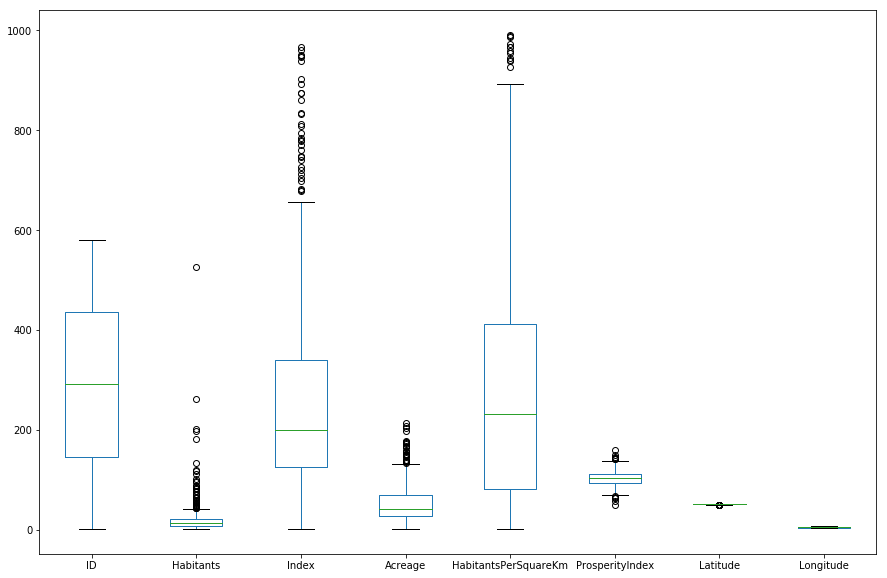

In [29]:
 df_cities_and_lang.plot(kind='box',figsize=(15,10))

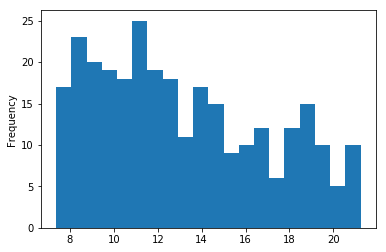

In [32]:
ser_hab = df_cities_and_lang['Habitants']
ser_hab = ser_hab[ser_hab.between(ser_hab.quantile(.25), ser_hab.quantile(.75))]
ser_hab.plot(kind='hist',bins=20)